# Setup

In [ ]:
!pip install ultralytics --quiet
!pip install roboflow --quiet
!pip install torch torchvision onnx onnx2keras tensorflow --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 779.6/779.6 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 54.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 801.4 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.7 MB/s eta 0:00:00
Reason for being yanked: deprecated, use 4.8.0.76
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 64.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [ ]:
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.28 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 30.2/78.2 GB disk)


In [ ]:
from ultralytics import YOLO
from IPython.display import display, Image
import shutil
from google.colab import files
import torch
import os
import onnx
from onnx2keras import onnx_to_keras
from roboflow import Roboflow

In [ ]:
HOME = os.getcwd()
print(HOME)

/content


# Data

In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

/content/datasets


In [ ]:
rf = Roboflow(api_key="omDBjHRrb9UFDvmRW9cb")
project = rf.workspace("dataset-jerawat").project("capstone-bjc8v")
version = project.version(2)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.28, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to Capstone-2 in yolov8:: 100%|██████████| 3240/3240 [00:01<00:00, 2042.24it/s]


# 50-800

In [7]:
%cd {HOME}
!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=50 imgsz=1024 plots=True

/content
100% 21.5M/21.5M [00:00<00:00, 182MB/s]
Ultralytics YOLOv8.2.28 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/Capstone-2/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=1024, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=F

In [8]:
!ls {HOME}/runs/detect/train/

args.yaml					    PR_curve.png	 train_batch3761.jpg
confusion_matrix_normalized.png			    R_curve.png		 train_batch3762.jpg
confusion_matrix.png				    results.csv		 val_batch0_labels.jpg
events.out.tfevents.1717760066.fea38115ef4a.4281.0  results.png		 val_batch0_pred.jpg
F1_curve.png					    train_batch0.jpg	 val_batch1_labels.jpg
labels_correlogram.jpg				    train_batch1.jpg	 val_batch1_pred.jpg
labels.jpg					    train_batch2.jpg	 weights
P_curve.png					    train_batch3760.jpg


/content


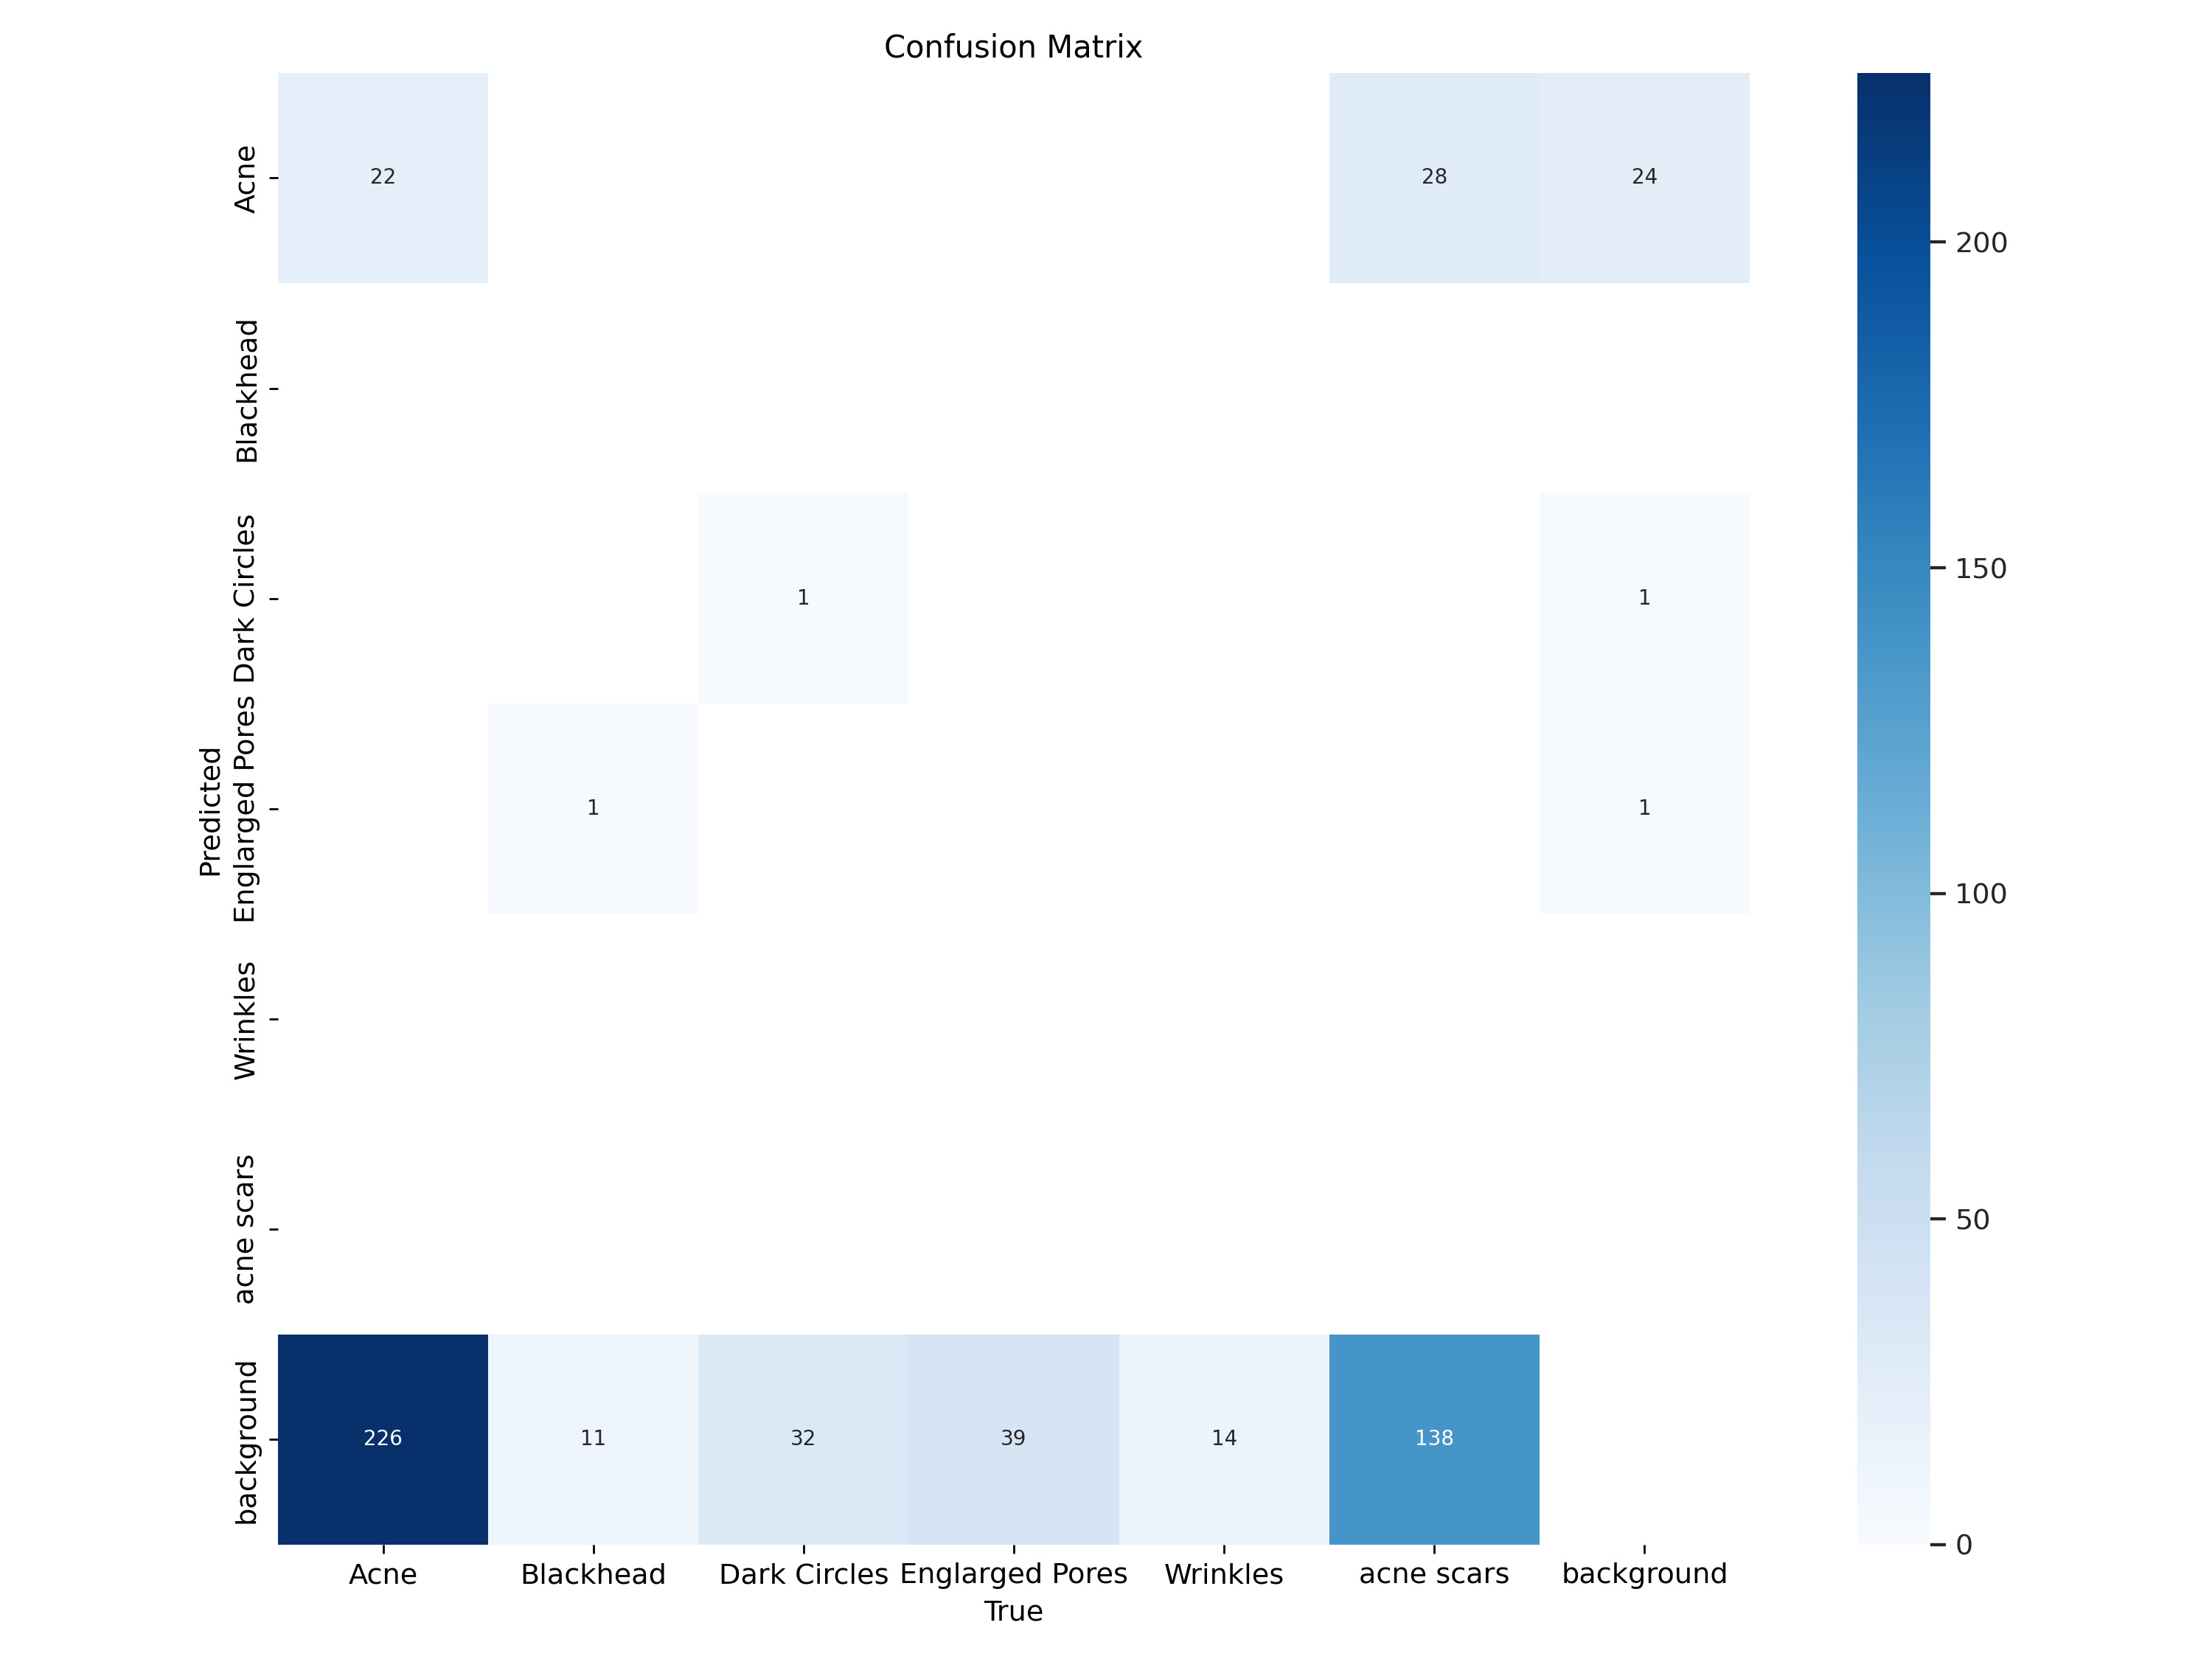

In [9]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

In [10]:
# data validasi
%cd {HOME}
!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.2.28 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127906 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/Capstone-2/valid/labels.cache... 59 images, 0 backgrounds, 0 corrupt: 100% 59/59 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 4/4 [00:08<00:00,  2.15s/it]
                   all         59        512      0.314      0.268      0.203      0.071
                  Acne         41        248      0.104      0.472      0.119     0.0434
             Blackhead          8         12      0.167     0.0833      0.105     0.0236
          Dark Circles         22         33      0.432      0.545      0.481      0.186
       Englarged Pores         27         39      0.342      0.256      0.156     0.0511
              Wrinkles          8         14      0.559      0.214       0.23     0.0863
            acne scars         30  

In [11]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
Ultralytics YOLOv8.2.28 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127906 parameters, 0 gradients, 28.4 GFLOPs

image 1/61 /content/datasets/Capstone-2/test/images/105_jpg.rf.fdbb4425709236717e814e854d280150.jpg: 1024x1024 (no detections), 32.7ms
image 2/61 /content/datasets/Capstone-2/test/images/106_jpg.rf.c4a911c52560c4fdc2ba2f4281644b0b.jpg: 1024x1024 (no detections), 32.6ms
image 3/61 /content/datasets/Capstone-2/test/images/107_jpg.rf.053cb806c2c38355b2cbcd73a5a7b883.jpg: 1024x1024 (no detections), 32.6ms
image 4/61 /content/datasets/Capstone-2/test/images/10_jpg.rf.e36e88cfb9af088dde2260e0fc96f8bd.jpg: 1024x1024 4 Acnes, 32.6ms
image 5/61 /content/datasets/Capstone-2/test/images/116_jpg.rf.75bc03341ab978ea5462a233930f24d3.jpg: 1024x1024 3 Acnes, 32.6ms
image 6/61 /content/datasets/Capstone-2/test/images/120_jpg.rf.99d26e5a75d9bd6bc4de21bb070c2c8e.jpg: 1024x1024 4 Acnes, 32.7ms
image 7/61 /content/datasets/Capstone

/content


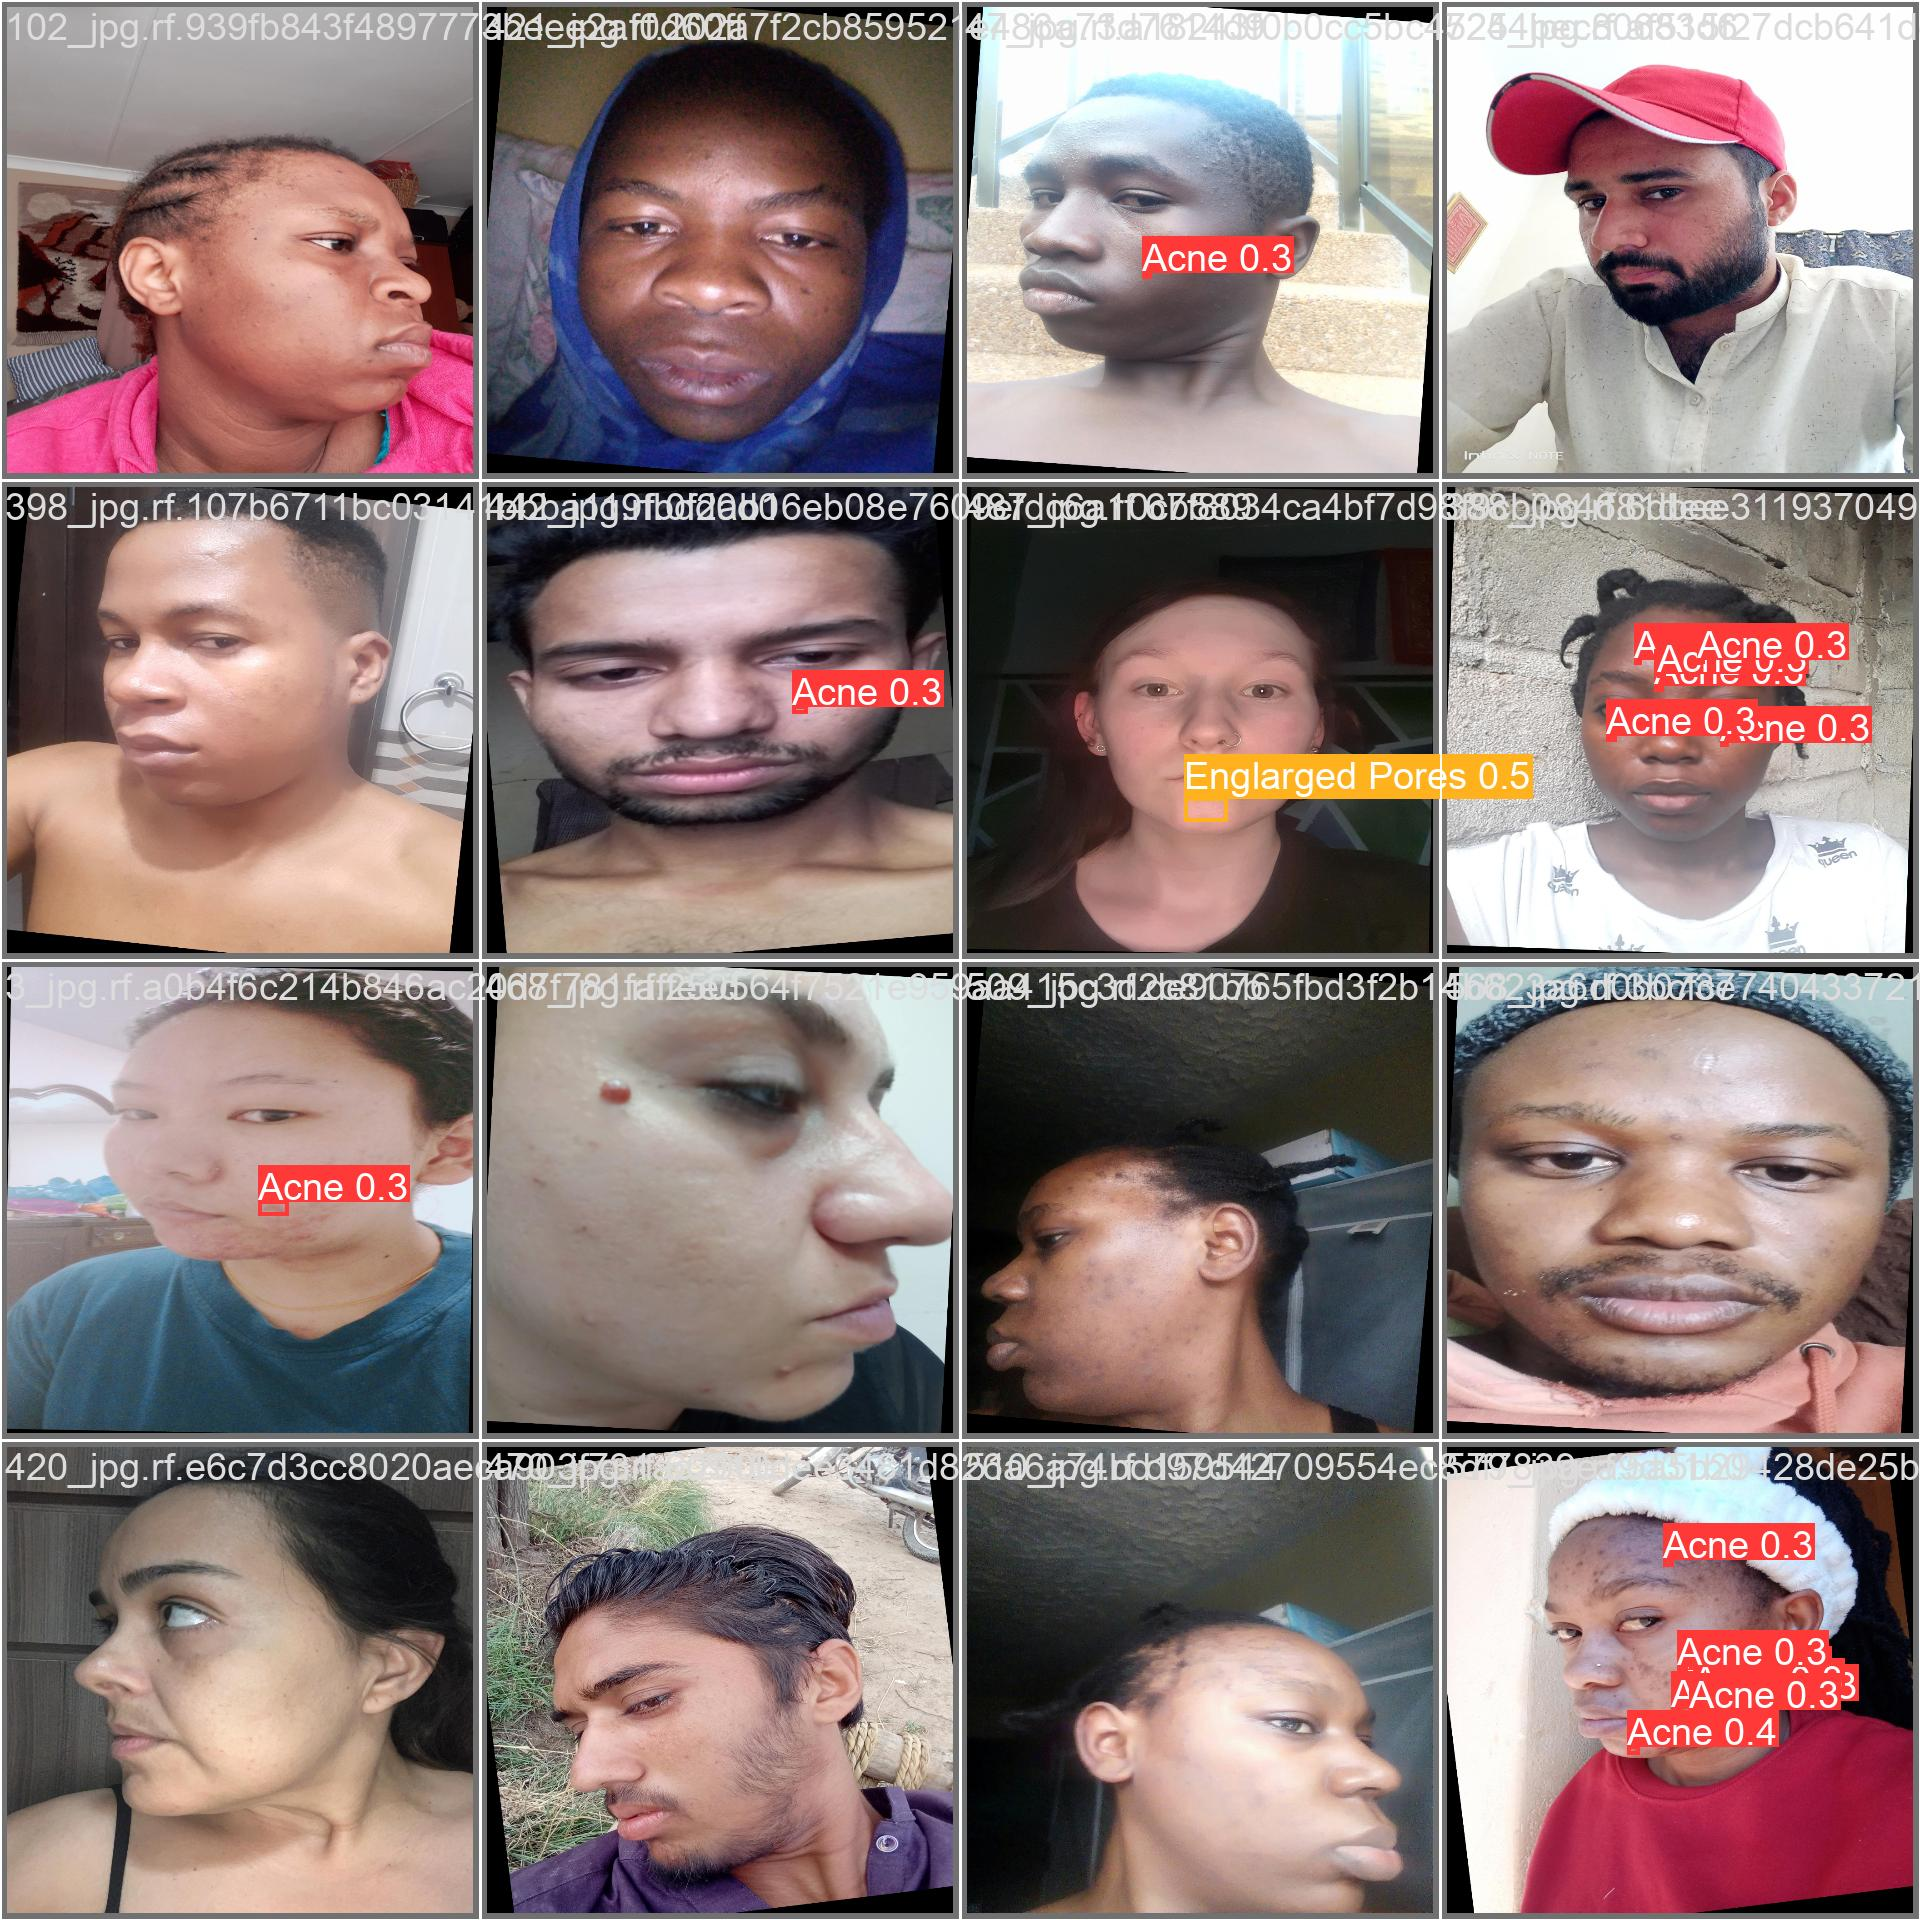

In [12]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

## Export

In [14]:
folder_path = '/content/runs/detect/train/'
zip_path = '/content/D5M4_50_1024.zip'
shutil.make_archive(zip_path.replace('.zip', ''), 'zip', folder_path)
files.download(zip_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [15]:
best_model_path = 'runs/detect/train/weights/best.pt'
shutil.copy(best_model_path, 'D5M4_50_1024.pt')
files.download('D5M4_50_1024.pt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>